<a href="https://colab.research.google.com/github/eriklidb/Foundations-of-Machine-Learning/blob/main/Ex2_LIDBJ%C3%96RK_ERIK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
#! Required python packages: numpy, scipy, scikit-learn, matplotlib, seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exercise 2 - ML & Optimization  (DD1420 HT22)

## Instructions

This Jupyter Notebook contains the exercises for DD1420 **Module 2 ML & Optimization**. There are a several problems in this exercise, each broken into numbered subproblems, *e.g.* 1.1.1. The points for each problem are marked *e.g.* $\color{red}{\text{(} x \text{ points)}}$. In total, the exercise is worth **31** points.

<br>

Students are allowed to work on this exercise in pairs. Make sure you have formed a group in Canvas with your partner. Each student is responsible for following the Code of Conduct. In particular (1) All members of a group are responsible for the group's work, (2) Every student shall honestly disclose any help received and sources used, and (3) Do not copy from other people's solutions. If you need assistance with the exercise, you are encouraged to post a question to the appropriate Discussion Topic or sign up for a help session.

<br> 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete `raise NotImplementedError()` once you have implemented the solution.

<br>

You should not import any libraries on top of the ones included in the assignment. Derivation questions can be answered using $\LaTeX$, or you may upload an image of your derivation. To do so in *Google Colab* simply create a text cell, click on the `insert image` icon, and upload an image to the notebook as we have demonstrated below.

<br>

**Submission** - once you have completed the exercise make sure everything runs as expected by going into `Runtime` -> `Restart and Run all`. Then download the notebook by clicking `file` -> `download` -> `download .ipynb`. Then **rename the file to include your name** (and **your partner's name** if you have one) as follows

<br>

`Ex??_LASTNAME_FIRSTNAME_and_LASTNAME_FIRSTNAME.ipynb`

<br>

where you replace `??` with the correct exercise number. If you are working alone you do not need to include a partner name. Correctly naming the file and including your name (and your partner's) below is worth **1 point** - if you fail to correctly name the file or include your partner's name, *you will lose this point*. 

<br>

Good luck!

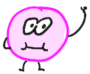

#Name
**Fill in your name and your partner's name below** (and name the `.ipynb` file correctly):

<br>

### Student 1

Erik Lidbjörk

### Student 2  (if you work with a partner)

## 2.1 Linear Regression with RANSAC (3 pts)


A mad scientist has created an artificial dataset $\mathcal{D}=\lbrace (x_i, y_i) \rbrace_{i=1}^n$ according to the definition $y = e \cdot x + e + \varepsilon$ where $e$ is the *Euler constant* and where $\varepsilon \in U(-1, 1)$, i.e. $\varepsilon$ is an error sampled from the uniform distribution defined on the interval $(-1, +1)$. 

Suppose we are interested in figuring out what the scientist was up to. Our goal is to retrieve the parameters $w=e$ and $b=e$ by performing a linear regression on the dataset. The dataset $\mathcal{D}$ is generated as follows:

In [352]:
import numpy as np
N = 100
xs = np.linspace(0, 10, N)
ys = np.e * xs + np.e + (2 * np.random.rand(N) - 1)

Observe that ```np.random.rand``` generates uniform samples in the unit interval $(0, 1)$. We can transform them into our desired $(-1, 1)$ interval by multiplying each sample by 2 and subtracting 1 from it.

We can plot the points as follows:

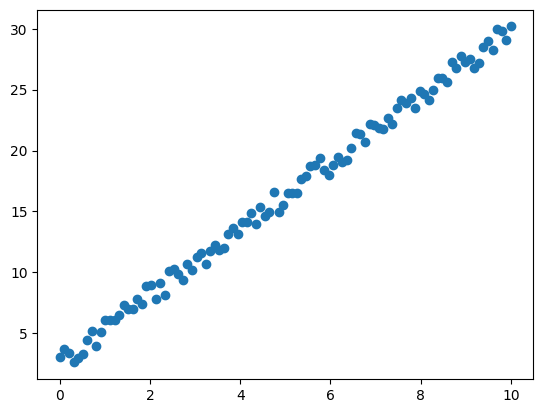

In [353]:
import matplotlib.pyplot as plt
plt.scatter(xs, ys)

We will apply the **RANSAC** algorithm to find  $w$ and $b$. The algorithm requires three steps:
1. Choosing two points from the dataset
2. Finding the line that crosses both points
3. Checking how well the found line matches the other points

**2.1.1.** *Write a function ```size_two_subsets = all_size_two_subsets(ls)``` that accepts a list ```ls``` as input and outputs a list ```size_two_subsets``` of all subsets of size 2.* $\color{red}{\text{(1 point)}}$

In [354]:
def all_size_two_subsets(ls):
  """Returns a list of all subsets of size two."""
  # YOUR CODE HERE
  subsets = []
  for index, fstElem in enumerate(ls):
    for sndElem in ls[index + 1 :]:
      subsets.append((fstElem, sndElem))
  return subsets

**2.1.2.** *Write a function ```w, b = linear_fit(x1, y1, x2, y2)``` that accepts two points $p_1 = (x_1, y_1)$ and $p_2 = (x_2, y_2)$ and outputs the parameters $w, b $ of the line $w \cdot x + b$ that passes through these two points.* $\color{red}{\text{(0.5 point)}}$

In [355]:
def linear_fit(x1, y1, x2, y2):
  """Returns w,b that fit (x1,y1) and (x2,y2)"""
  # YOUR CODE HERE
  w = (y2 - y1) / (x2 - x1)
  b = y1 - w * x1
  return w,b

**2.1.3.** *Write a function ```score_candidate(w, b, xs, ys)``` that computes how well the found linear equation fits the dataset. For this, calculate the difference between $y_i$ and $w \cdot x_i + b$ for each $x_i$. Return the RMSE.* $\color{red}{\text{(0.5 point)}}$

In [356]:
def score_candidate(w, b, xs, ys):
  """Returns the RMSE for a given w,b"""
  # YOUR CODE HERE
  # Return square root of mean of the sum of (yi^ - yi)^2.
  return (sum([(w*x+b - y)**2 for (x,y) in zip(xs,ys)]) / len(xs)) ** (1/2)

How good of a fit we get if we use the first two points in the list?

RMSE = 22.148112825528376


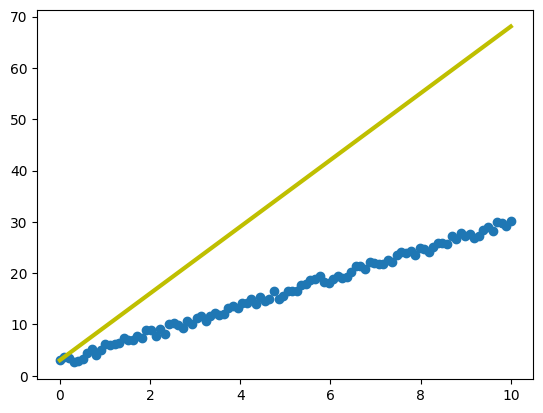

In [357]:
x1 = xs[0]
x2 = xs[1]
y1 = ys[0]
y2 = ys[1]
w,b = linear_fit(x1,y1,x2,y2)
print('RMSE =',score_candidate(w,b,xs,ys))
plt.scatter(xs, ys)
plt.plot(xs, w * xs + b, 'y-', linewidth=3)

Let's see if we can improve this using a simplified version of RANSAC.

<br>

**2.1.4.** * Evaluate ```score_candidate``` for every two-element subset from ```size_two_subsets``` and output the best parameters $w^\star, b^\star$. Print the RMSE along with $w$ and $b$ each time it improves.* $\color{red}{\text{(1 point)}}$

RMSE = 22.148112825528376   w = 6.502895485528012   b = 3.044917676860355
RMSE = 6.023824635676671   w = 1.6420079299178558   b = 3.044917676860355
RMSE = 2.6246189089867618   w = 2.2358856904801723   b = 3.044917676860355
RMSE = 1.8348333404764223   w = 2.977911462849877   b = 3.044917676860355
RMSE = 0.6572188762259875   w = 2.72780009091251   b = 3.044917676860355
RMSE = 0.5932906930076727   w = 2.688691514828263   b = 3.044917676860355
RMSE = 0.5905255994619337   w = 2.673018712203265   b = 3.044917676860355
RMSE = 0.5903184361597129   w = 2.681607101622472   b = 3.044917676860355
RMSE = 0.5899015229393565   w = 2.677206459954207   b = 3.044917676860355
RMSE = 0.5711560115836927   w = 2.7010839592564366   b = 2.8309629234586215
RMSE = 0.5698135312279825   w = 2.704368783498848   b = 2.8302993226015687
RMSE = 0.5689773535555838   w = 2.711342644828647   b = 2.7567619469521887
RMSE = 0.5663491972620827   w = 2.7199637119295312   b = 2.751537057800138
RMSE = 0.5659769337523278   w = 2

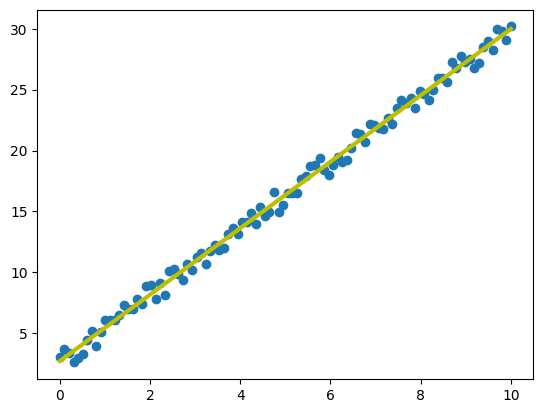

In [358]:
w_star, b_star = None, None
pts = np.stack([xs, ys], axis=1)
size_two_subsets = all_size_two_subsets(pts)
best_score = np.inf
for size_two_subset in size_two_subsets:
  # YOUR CODE HERE
  [x_1,y_1], [x_2,y_2] = size_two_subset
  w,b = linear_fit(x_1,y_1,x_2,y_2)
  current_score = score_candidate(w,b,xs,ys)
  if current_score < best_score:
    # YOUR CODE HERE
    print('RMSE = {}   w = {}   b = {}'.format(current_score, w, b))
    best_score = current_score
    w_star, b_star = w, b

# plotting your solution
plt.scatter(xs, ys)
plt.plot(xs, w_star * xs + b_star, 'y-', linewidth=3)

## 2.2 Applying the algebraic solution to linear regression (3 pts)

Now that we have an intuition of how linear regression works, let's now repeat **2.1** with some basic linear algebra. Here is a small dataset from the mad scientist.

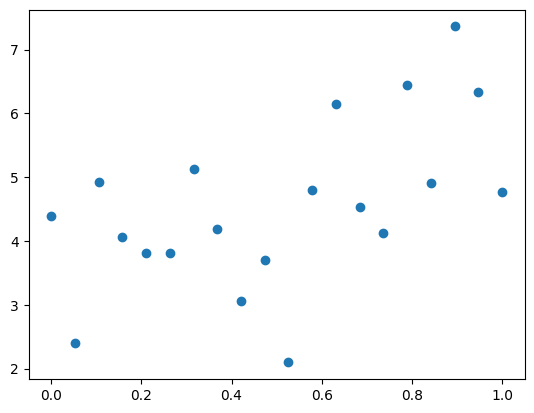

In [359]:
import numpy as np
import matplotlib.pyplot as plt
n = 20
xs = np.linspace(0, 1, n)
ys = np.e * xs + np.pi + np.random.randn(n)
plt.scatter(xs, ys);

**2.2.1** *Show that prepending $1$s to $x$ and having a single matrix multiplication using $\theta^T$ is equivalent to $ y = w^T x + b$.*  $\color{red}{\text{(1 point)}}$

*hint: You can explicitly do the multiplication after defining the new terms, e.g.,*

$ \theta^T =
 \begin{bmatrix}
  b_{1} & w_{1,1} & \cdots & w_{1,n}\\
  b_{2} & w_{1,2} & \cdots & w_{2,n} \\
  \vdots  & \vdots & \ddots & \vdots \\
  b_{m} & w_{1,m} & \cdots & w_{m,n}
 \end{bmatrix} = \begin{bmatrix}
  b_{1} & 0 & \cdots & 0\\
  b_{2} & 0 & \cdots & 0 \\
  \vdots  & \vdots & \ddots & \vdots \\
  b_{m} & 0 & \cdots & 0
 \end{bmatrix} + \begin{bmatrix}
  0 & w_{1,1} & \cdots & w_{1,n}\\
  0 & w_{1,2} & \cdots & w_{2,n} \\
  \vdots  & \vdots & \ddots & \vdots \\
  0 & w_{1,m} & \cdots & w_{m,n}
 \end{bmatrix}$


$\color{green}{\text{YOUR ANSWER HERE}}$
$$\theta^T \begin{bmatrix} 1_M & x \end{bmatrix} = 
 \begin{bmatrix}
  b_{1} & w_{1,1} & \cdots & w_{1,n}\\
  \vdots  & \vdots & \ddots & \vdots \\
  b_{m} & w_{1,m} & \cdots & w_{m,n}
 \end{bmatrix}
 \begin{bmatrix}
  1 & x_1 \\
  \vdots & \vdots \\
  1 & x_n
 \end{bmatrix}$$


**2.2.2** *Write a function ```b, w = linear_regression(x, y)``` that performs linear regression. Recall that the function that we want to minimize is*

$L = \frac{1}{n}\sum_{i=1}^N (y_i - \hat{y}_i)^2$


 *Use the matrix solution we found in the lecture notes for $\theta^*$. Apply it to the dataset above. Plot the solution and print the values.* $\color{red}{\text{(2 points)}}$

w =  2.3242773209653733 b =  3.385454851682264


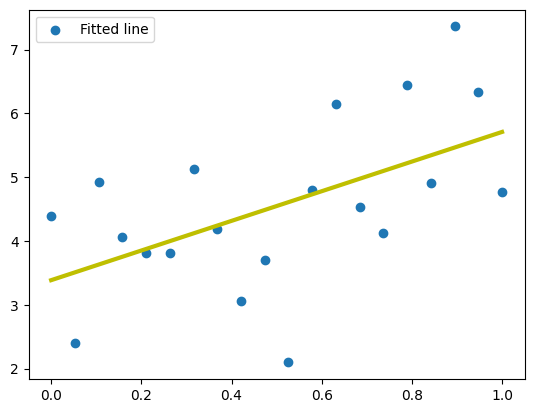

In [360]:
def linear_regression(xs, ys):
    """
    Returns an algebraic solution for w,b given
    xs: np.ndarray of shape [n]
    ys: np.ndarray of shape [n]
    """
    # YOUR CODE HERE
    X = np.column_stack((np.ones(len(xs)), xs))

    # Linear regression done by solving the equation X^T X theta* = X^T y => theta* = (x^T X)^(-1) X^T y.
    theta = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, ys))

    # X = ... should be of shape (20,2), remember to prepend 1 to each point
    # X would look something like this
    # [ 1   x_1
    #   1   x_2 
    #   ...
    #   1   x_n ]
    # Y = ... should be of shape (20,1)
    # implement the theta* equation in the matrix form we derived at the end of the lecture notes 3.2
    return theta
b, w = linear_regression(xs,ys)
print('w = ', w, 'b = ', b)
zs = xs*w + b
_, ax = plt.subplots()
ax.scatter(xs, ys)
ax.plot(xs, zs, 'y-', linewidth=3);
ax.legend(['Fitted line']);

## 2.3 Using linear regression for non-linear relationships (4 pts)


Linear regression is often misunderstood in the sense that people believe that it can only be used to fit "lines" (i.e. for *linear* relationships between $x$ and $y$) even though the "linearity" refers to being linear with respect to the weights (i.e. the relationship between $w$ and $y$ is assumed to be linear).

Take a look at graph of the dataset $\mathcal{D} = \lbrace (x_i, y_i) \rbrace$ showing a non-linear relationships between $x$ and $y$:

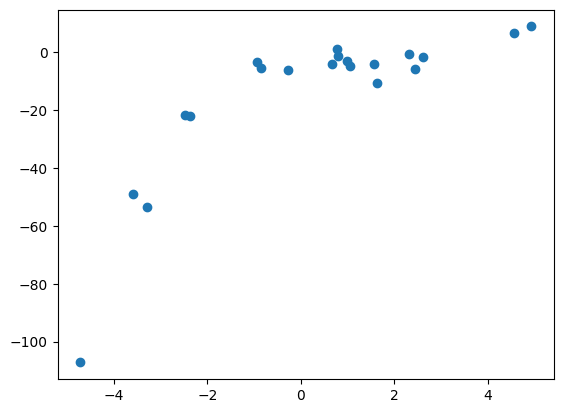

In [361]:
import numpy as np
import matplotlib.pyplot as plt

n = 20
np.random.seed(0)
xs = 2 - 3 * np.random.normal(0, 1, n)
ys = xs - 2 * xs ** 2 + 0.5 * xs ** 3 + np.random.normal(-3, 3, n)
plt.scatter(xs,ys);

If we naively apply **SK-learn**'s linear regression function, we use the model 

$y = \theta^{\intercal}x = w^T x + b$

and we just end up fitting a straight line though the points. 😞

RMSE =  15.908242501429998


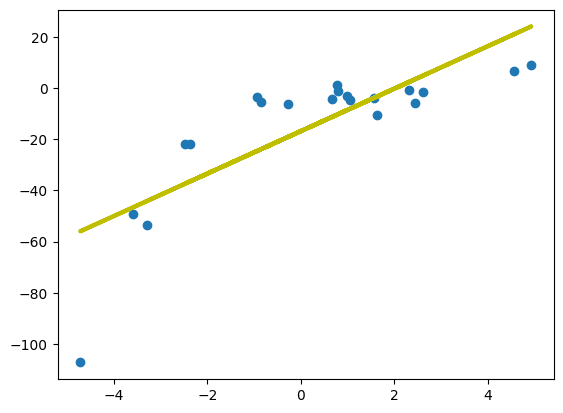

In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# here is how you define and train a model with sklearn
model = LinearRegression()
model.fit(xs[:, np.newaxis], ys[:, np.newaxis])

# here is how you make predictions
y_pred = model.predict(xs[:, np.newaxis])

rmse = np.sqrt(mean_squared_error(ys,y_pred))
print('RMSE = ', rmse)

plt.scatter(xs, ys)
plt.plot(xs, y_pred, 'y-', linewidth=3)
plt.show()

To get a better fit, we fit the data with a cubic polynomial. Define $\Phi(x) = [1, x, x^2, x^3]^T$, then the model equation is given by:

<br>

$y= \theta^T \Phi(x) = b + w_1 x + w_2 x^2 + w_3 x^3$ 

<br>

Notice that the relationship between $θ$ and $y$ is still linear!

**2.3.1.** *Write a function ```x_poly = polynomial_features(x)```** that computes $\Phi(x)$ for each $x$, transforming it to ``x_poly``.* $\color{red}{\text{(1 point)}}$


In [363]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_features(xs):
    """
    x: A np.ndarray of shape [N]
    Returns:
        x_poly: A np.ndarray of shape [N, 4]
    """
    # YOUR CODE HERE
    N = len(xs)
    ones = np.ones(N)
    xs_squared = np.multiply(xs, xs)
    xs_cubed = np.multiply(xs_squared, xs)
    x_poly = np.column_stack((ones, xs, xs_squared, xs_cubed))
    return x_poly

You can do the same thing, with less coding, using the sklearn library as well. Try that here and double check you are getting the same results.

*hint: [look up](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) the function we imported.*

In [364]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_features_sklearn(x):
    """
    x: A np.ndarray of shape [N]
    Returns:
        x_poly: A np.ndarray of shape [N, 4]
    """
    polynomial_features= PolynomialFeatures(degree=3)
    x_poly = polynomial_features.fit_transform(x[:, np.newaxis])
    return x_poly

In [365]:
assert np.allclose(polynomial_features_sklearn(xs), polynomial_features(xs))

Our goal here will be to get the model to predict the outputs given the (polynomial) input features. Here is how you would get the predictions (not the coefficients) in sklearn:



```
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
predictions = model.predict(x)
```


There is an obvious question here: Why would we try and predict *y* values for points we already know the *y*? The answer is that we usually would not, at least not in ML. This exercise is just to get your feet wet.

**2.3.2** *Write a function* ```w = polynomial_linear_regression(x_poly, y)``` *that optimizes for $\theta$ and outputs the optimal parameter vector $\theta^* \in \mathbb{R}^4$.* $\color{red}{\text{(1 point)}}$

*hint: ```sklearn``` calls the model weights as model coefficients. as usual, you can take a look at the official documentation.*

In [366]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def polynomial_linear_regression(x_poly, ys):
    """
    x: A np.ndarray of shape [N, 4]
    y: A np.ndarray of shape [N]
    Returns:
        w: A np.ndarray of shape [4]
    """
    # YOUR CODE HERE
    model = LinearRegression()
    model.fit(x_poly,ys)
    return model.coef_

**2.3.3** *Write a function* ```y_poly_pred = apply_weights(x_poly, w)``` *that applies the weights to* $x$, $\theta^{\intercal}\phi(x)$ *to get a prediction.* $\color{red}{\text{(1 point)}}$ 

In [367]:
def apply_weights(x_poly, w):
    """
    x_poly: A np.ndarray of shape [N, 4]
    w: A np.ndarray of shape [4]
    Returns:
      y_pred: the predicted value for x
    """
    # YOUR CODE HERE
    # return ... # do the matrix multiplication, pay attention to the dimensions
    y_poly_pred = np.inner(x_poly, w)
    return y_poly_pred

**2.3.4.** *Fit the model to the data to find $\theta^*$. Compute the RMSE for the predictions your model made.* $\color{red}{\text{(1 point)}}$

*hint: look up the imported function, you can calculate the RMSE more conveniently with that.*

In [368]:
from sklearn.metrics import mean_squared_error
# YOUR CODE HERE
# x_poly = ... # get the polynomial features
# w = ... # find the fitted weights
# y_poly_pred = ... # do the predictions
# rmse = ...
x_poly = polynomial_features(xs)
w = polynomial_linear_regression(x_poly,ys)
y_poly_pred = apply_weights(x_poly,w)
rmse = mean_squared_error(ys, y_poly_pred)
print('RMSE = ', rmse)

RMSE =  16.445489201016784


And now let's visualize our beautiful polynomial fit using linear regression.

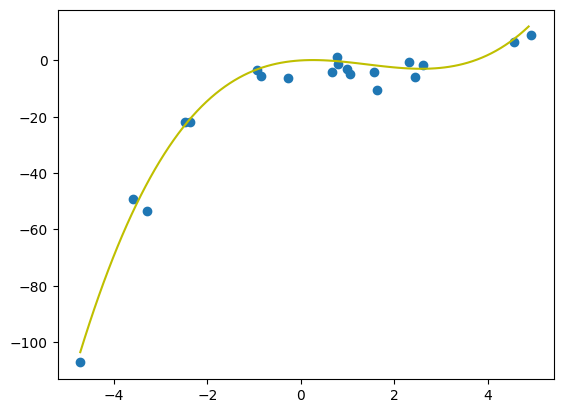

In [369]:
xi = np.arange(min(xs),max(xs),0.1)
xi_poly = polynomial_features(xi)
yi_poly_pred = apply_weights(xi_poly,w)
plt.scatter(xs, ys)
plt.plot(xi, yi_poly_pred,'y-')
plt.show()

## 2.4 Logistic regression  (8 pts)



The mad scientist is at it again! He's created another strange dataset. This time, it seems to have yellow and blue samples.

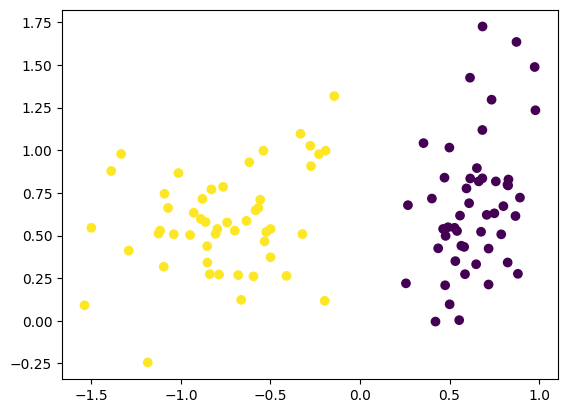

In [370]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
xs, ys = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=.65)
plt.figure(0)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=ys);

This looks like a classification problem! 

<br>

As we saw in the Lecture Notes, *logistic regression* is motivated by the desire to classify a sample (e.g. some vector) into two classes $\pmb{y} = \{0,1\}$. We can model this as

<br>

$\mathcal{P}_{\pmb{y}|\pmb{x}} (y| \pmb{x} = x_i) = p^{\pmb{y}} (1-p)^{1-\pmb{y}}\quad $   

<br>

where $\quad \hat{p} = \sigma(\theta^{\intercal} x_i) $ and $\sigma(x) = \frac{1}{1+e^{-x}}$ is the so-called *sigmoid* (or logistic) function. Plugging in gives

<br>

$\mathcal{P}_{\pmb{y}|\pmb{x}} (y| \pmb{x} = x_i) = \sigma(\theta^{\intercal} x_i)^{y_i} \, (1 - \sigma(\theta^{\intercal} x_i))^{1-y_i}$

<br>

and taking the $\log$ gives the *binary cross entropy* loss 

<br>

$\begin{align}
\log \mathcal{P}_{\pmb{y}|\pmb{x}} (y| \pmb{x} = x_i) 
&= y_i \log \sigma(\theta^{\intercal} x_i) - (1 - y_i) \log (1-\sigma(\theta^{\intercal} x_i)) \\
&= y_i \log \sigma(w^{\intercal} x_i + b) - (1 - y_i) \log (1-\sigma(w^{\intercal} x_i + b)) 
\end{align}$

<br>


We can turn this into an average loss function $L$ by summing over the dataset and adding a minus ($-$) sign because we want to minimize it

<br>

$\begin{align}
L(w,b) &= -\sum_{i=1}^n \lbrace y_i \cdot \log \sigma(w^T \cdot x_i + b) + (1-y_i) \cdot \log (1 - \sigma(w^T \cdot x_i + b))  \rbrace 
\end{align}$

**2.4.1** *Show that the derivative of the average binary cross entropy loss* $L$ *w.r.t. $w$ is given by (fill in the missing steps)* $\color{red}{\text{(2 points)}}$

$\begin{align}
\frac{\partial}{\partial w}\, L(w,b) &= \frac{\partial}{\partial w}\, -\sum_{i=1}^n \lbrace y_i \cdot \log \sigma(w^T \cdot x_i + b) + (1-y_i) \cdot \log (1 - \sigma(w^T \cdot x_i + b))  \rbrace 
\end{align}$

<br>

$\color{green}{\text{YOUR ANSWER HERE}}$

We refer to the identities handed below this answer as id 1 and id 2.
$$\frac{\partial}{\partial w}\, L(w,b) = \frac{\partial}{\partial w}\, -\sum_{i=1}^n \lbrace y_i \cdot \log \sigma(w^T \cdot x_i + b) + (1-y_i) \cdot \log (1 - \sigma(w^T \cdot x_i + b))  \rbrace =$$
Distribute derivative operator in to both terms in sum and use id 1 on right term.
$$= -\sum_{i=1}^n \lbrace y_i \cdot \frac{\partial}{\partial w} \left( \log \sigma(w^T \cdot x_i + b) \right) + (1-y_i) \cdot \frac{\partial}{\partial w} \left(\log (\sigma(-(w^T \cdot x_i + b)))\right)  \rbrace =$$
Use id 2 on both terms.
$$= -\sum_{i=1}^n \lbrace y_i \cdot \frac{\partial}{\partial w} \cdot \left(w^T \cdot x_i + b\right) \sigma(-(w^T \cdot x_i + b)) + (1-y_i) \cdot \frac{\partial}{\partial w} \cdot \left(-(w^T \cdot x_i + b)\right) (\sigma(--(w^T \cdot x_i + b)))  \rbrace =$$
Distribute negative on left sigmoid term and cancel double negative on right sigmoid term. Compute derivatives analyticaly w.r.t. $w$ which the answer is $\pm x_i$ respectivly, which is known from taking partial derivative from dot product and constant term is removed.
$$= -\sum_{i=1}^n \lbrace y_i \cdot x_i \cdot \sigma(-w^T x_i - b) + (1-y_i) \cdot -x_i \cdot (\sigma(w^T x_i + b))  \rbrace =$$
Distribute outside negative sign in to sum and commute terms.
$$= \sum_{i=1}^n \lbrace (1-y_i) \cdot x_i \cdot \sigma(w^T x_i + b) - y_i \cdot x_i \cdot \sigma(-w^T x_i - b) \rbrace$$
And we have our answer.

<br>

$\begin{align}
\frac{\partial}{\partial w}\, L(w,b) &= \sum_{i=1}^n \lbrace (1-y_i) \cdot x_i \cdot \sigma(w^T x_i + b) - y_i \cdot x_i \cdot \sigma(-w^T x_i - b) \rbrace
\end{align}$

Hint: a couple of identities can help simplify the equations:

\begin{align}
1 - \sigma(x) &= \sigma(-x) \\
\frac{\partial}{\partial \mathbf{w}} \log \sigma(g(\mathbf{w})) &= \frac{\partial g}{\partial \mathbf{w}} \cdot \sigma(-g(\mathbf{w}))
\end{align}

**2.4.2** *Show that the derivative of the average binary cross entropy loss* $L$ *w.r.t. $b$ is given by (fill in the missing steps)* $\color{red}{\text{(2 points)}}$

$\begin{align}
\frac{\partial}{\partial b}\, L(w,b) &= \frac{\partial}{\partial b}\, -\sum_{i=1}^n \lbrace y_i \cdot \log \sigma(w^T x_i + b) + (1-y_i) \cdot \log (1 - \sigma(w^T x_i + b))  \rbrace 
\end{align}$

<br>

$\color{green}{\text{YOUR ANSWER HERE}}$

We refer to the identities handed above this answer as id 1 and id 2.
This solution is almost identical to the preceding one but we take the derivative with respects to $b$ instead of $w$,
but we give the complete derivation none the less.
$$\frac{\partial}{\partial w}\, L(w,b) = \frac{\partial}{\partial w}\, -\sum_{i=1}^n \lbrace y_i \cdot \log \sigma(w^T \cdot x_i + b) + (1-y_i) \cdot \log (1 - \sigma(w^T \cdot x_i + b))  \rbrace =$$
Distribute derivative operator in to both terms in sum and use id 1 on right term.
$$= -\sum_{i=1}^n \lbrace y_i \cdot \frac{\partial}{\partial w} \left( \log \sigma(w^T \cdot x_i + b) \right) + (1-y_i) \cdot \frac{\partial}{\partial w} \left(\log (\sigma(-(w^T \cdot x_i + b)))\right)  \rbrace =$$
Use id 2 on both terms.
$$= -\sum_{i=1}^n \lbrace y_i \cdot \frac{\partial}{\partial w} \cdot \left(w^T \cdot x_i + b\right) \sigma(-(w^T \cdot x_i + b)) + (1-y_i) \cdot \frac{\partial}{\partial w} \cdot \left(-(w^T \cdot x_i + b)\right) (\sigma(--(w^T \cdot x_i + b)))  \rbrace =$$
Distribute negative on left sigmoid term and cancel double negative on right sigmoid term. Compute derivatives analyticaly w.r.t. $b$ which the answer is $1$ in both terms.
$$= -\sum_{i=1}^n \lbrace y_i \cdot \sigma(-w^T x_i - b) + (1-y_i) \cdot (\sigma(w^T x_i + b))  \rbrace =$$
Distribute outside negative sign in to sum and commute terms.
$$= \sum_{i=1}^n \lbrace (1-y_i) \cdot \sigma(w^T x_i + b) - y_i \cdot \sigma(-w^T x_i - b) \rbrace$$
And we have our answer.


<br>

$\begin{align}
\frac{\partial}{\partial b}\, L(w,b) &= \sum_{i=1}^n \lbrace (1-y_i) \cdot \sigma(w^T x_i + b) - y_i \cdot \sigma(-w^T x_i - b) \rbrace
\end{align}$

With these gradients in hand, your task is now to implement *batch stochastic gradient descent (SGD)*. Instead of looping over all samples $n$ you will loop over $B$ samples.

**2.4.3**  *Write a function ```xs_batch, ys_batch = sample_batch(xs, ys, B)``` that randomly samples $B$ elements from both ```xs``` and ```ys```.* $\color{red}{\text{(1 point)}}$

Consider for a moment how we would write the sampling operation in mathematical notation. Most common notation would be $(x, y) ∼ P(x,y)$, i.e. sampling from a joint distribution. 

But as is common, we only have a training set, not the actual distribution. How would we denote it in this case? Usually, it is denoted like $(x, y) \sim D$ but you will come accross various different notations in the literature. In code, they are the same thing.

In [371]:
def sample_batch(xs, ys, B):
    """ Returns a batch of (xs,ys) with B elements """
    assert len(xs) == len(ys), "Incompatible number of elements!"
    # YOUR CODE HERE
    xys = np.column_stack((xs,ys))
    xys_batch = xys[np.random.choice(xys.shape[0], B, replace=False), :]
    xs_batch = xys_batch[:, range(xs.shape[1])]
    ys_batch = xys_batch[:, -1]
    return xs_batch, ys_batch

**2.4.4** *Write a function ```gradient_w, gradient_b = logistic_regression_gradient(xs_batch, ys_batch, w, b)``` that calculates the gradient of $\frac{\partial \mathcal{L}}{\partial \mathbf{w}}$ and  $\frac{\partial \mathcal{L}}{\partial b}$ with respect to the batch ```xs_batch``` (shape $[B, 2]$) and ```ys_batch``` (shape $[B]$) where $B$ is some arbitrary batch size.* $\color{red}{\text{(1 point)}}$


*hint: If you are not comfortable with vector operations, we suggest you to first solve this problem using a ```for``` loop. You can then compare your vector-based solution with the iterative ```for``` loop one to make sure you did it right.*

In [372]:
def sigmoid(z):
    "Numerically-stable sigmoid function."
    return np.exp(-np.logaddexp(0, -z))

def logistic_regression_gradient(xs_batch, ys_batch, w, b):
    """ Input: xs_batch [B x 2]
               ys_batch [B x 1]
        Returns: gradient_w, gradient_b """
    assert len(xs_batch) == len(ys_batch), "Incompatible number of elements!"
    assert len(w) == xs_batch.shape[1], "Incompatible shape of parameter w!"
    # YOUR CODE HERE
    # Use identities derived previously.
    # Compute by using vector operations instead of looping.
    zs_batch = sigmoid(np.matmul(xs_batch, w) + b)
    v = (1 - ys_batch) * zs_batch - ys_batch * (1 - zs_batch)
    gradient_w = np.matmul(v, xs_batch) / (len(ys_batch))
    gradient_b = np.sum(v) / (len(ys_batch))
    #gradient_w = sum([(1 - yi) * xi * sigmoid(np.dot(w, xi) + b) - yi * xi * sigmoid(-np.dot(w, xi) - b) for xi, yi in zip(xs_batch, ys_batch)])
    #gradient_b = sum([(1 - yi) * sigmoid(np.dot(w, xi) + b) - yi * sigmoid(-np.dot(w, xi) - b) for xi, yi in zip(xs_batch, ys_batch)])
    return gradient_w, gradient_b # take care that the returned values are calculated for a batch, not a single input/output pair 

**2.4.5** *Implement and apply* Stochastic Gradient Descent *to solve the logistic regression problem. Initialize the model with $w=[1 , 1]^T, b = 0$ and update the weights for $t = 10^4$ steps with a learning rate of $\alpha = 10^{-3}$. Apply SGD on ```xs``` and ```ys``` using a batch size $B = 16$. For each step calculate and record the accuracy of the trained model.* $\color{red}{\text{(2 points)}}$

In [373]:
T = 10**4
lr = 10**(-3)
w = np.ones(2)
ws = np.zeros(shape=[T, 2]) # store the w vector here at each step
b = 0.0
B = 16
accuracy = np.zeros(T)

for t in range(T):
  # YOUR CODE HERE
  xs_batch, ys_batch = sample_batch(xs, ys, B)
  gradient_w, gradient_b = logistic_regression_gradient(xs_batch, ys_batch, w, b)
  if t == 0:
    ws[0] = w - lr * gradient_w
  else:
    ws[t] = ws[t - 1] - lr * gradient_w
  # Consider prediction to be 1 or 0 based on p_hat >= 0.5.
  p_pred = sigmoid(np.matmul(xs, ws[t]))
  y_pred = (lambda p : p >= 0.5)(p_pred)
  accuracy[t] = (y_pred == ys).mean()

Let's plot the solution and visualize the decision boundary together with the data!

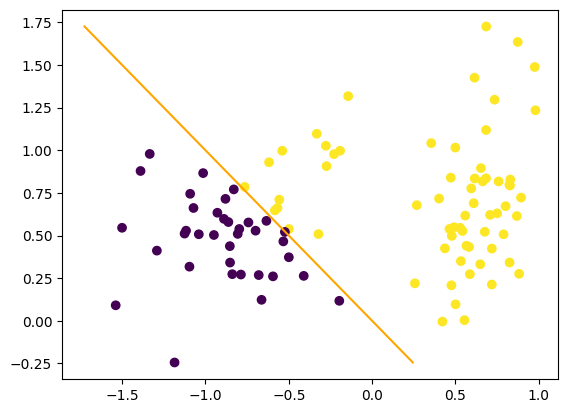

In [374]:
import matplotlib.pyplot as plt

w1, w2 = w
yy = np.linspace(np.min(xs[:, 1]), np.max(xs[:, 1]), 20)
xx = (w2 * yy + b)/(-w1)
plt.figure(1)
plt.plot(xx, yy, color="orange")
class_membership = np.sign(xs @ w + b)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=class_membership);

Plot the accuracy as a function of $t$ to see how we converged to a solution.

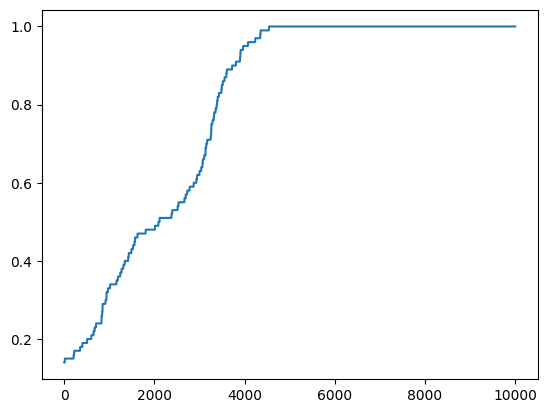

In [375]:
plt.figure(2)
plt.plot(accuracy);

## 2.5 Perceptron (4 pts)

The perceptron model defines a classifier of the form $\hat{y}(x) = \text{sgn}(\theta^T x)$ where $x \in \mathbb{R}^{d+1}$ is some input vector (with $\text{x}_0=0$ to include a bias term) and $\theta \in \mathbb{R}^{d+1}$ some trainable weight vector and $\text{sgn}(\cdot) $ is the sign function. The class labels are assumed to come from the set $\lbrace -1, 1 \rbrace$ due to the use of the $\text{sgn}$ function.

The basic idea of the model is to achieve that $\theta^T x > 0$ holds for samples with class label $y=1$ and, analogously, that $\theta^T \mathbf{x} < 0$ holds for samples with class label $y = -1$. Conveniently, both criteria can be summarized by the following rule:

<br>

$$
y \cdot \theta^T x > 0
$$



In this exercise, we will use the perceptron model on the same dataset as last time. But, first we have to adapt the labels to be $y = \{-1,1\}.

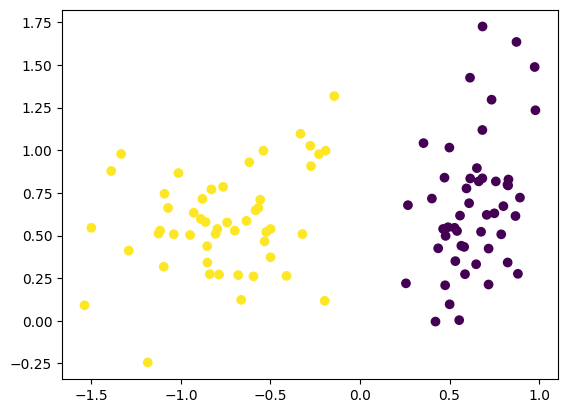

In [376]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
xs, ys = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=.65)
ys[ys == 0] = -1  # make the negative class labels == -1
plt.figure(0)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=ys);

Here is a helper function to plot the data and the decision of the perceptron based on $\theta$. Let's give an initial value of $\theta = [1 \, 1 \, 1]^T$ and see what the decision looks like.

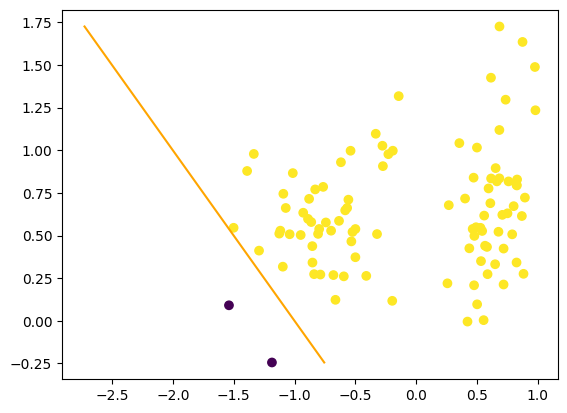

In [377]:
import numpy as np
def plot_perceptron(xs,w,t):
  """ input: xs data
             w = parameters [b w1 w2]
             t = figure handle
  """
  b, w1, w2 = w
  xs_hom = np.concatenate([np.ones(shape=[len(xs), 1]), xs], axis=1)
  yy = np.linspace(np.min(xs[:, 1]), np.max(xs[:, 1]), 20)
  xx = (w2 * yy + b)/(-w1)
  plt.figure(t)
  plt.plot(xx, yy, color="orange")
  class_membership = np.sign(xs_hom @ w)
  plt.scatter(x=xs[:, 0], y=xs[:, 1], c=class_membership)

w0 = np.ones(2 + 1)
plot_perceptron(xs,w0,-1)

**2.5.1** *Implement the* perceptron *algorithm from the Lecture Notes. We also provide you with a helper function to plot the decision of the perceptron. Include in the function an option to plot the decision of the perceptron every $t=10$ steps.* $\color{red}{\text{(2 points)}}$

In [378]:
def perceptron_algo(xs_hom, w, ys, pl):
  """ input:  xs_hom = [n x d+1] augmented xs 
              w0 = initial [b w1 w2]
              ys = [n x 1] labels
      output: w = optimized w
              accuracy = list of accuracy over t 
  """

  # YOUR CODE HERE
  n = len(ys)
  k = 0
  accuracy = []
  while True: # Loop while not converges <=> accuracy[t] != 1
    #i = np.random.randint(n)
    misses = 0
    for i in range(n):
      xi_hom, yi = xs_hom[i], ys[i]
      yi_pred = np.sign(np.dot(xi_hom, w))

      if yi != yi_pred:
        w += yi * xi_hom
        misses += 1

      k += 1
      if (k % 10 == 0) and (pl):
        plot_perceptron(xs,w,k)
    accuracy.append((n - misses) / n)
    if accuracy[-1] == 1:
      return w, accuracy, k

**2.5.2** *Apply the perceptron algorithm one pass over the data. Plot the perceptron decision every 10 iterations, and plot the accuracy over time.* $\color{red}{\text{(1 point)}}$

500


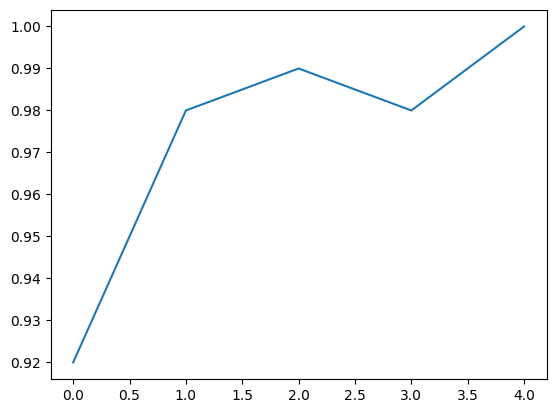

In [379]:
w0 = np.ones(2 + 1)
xs_hom = np.concatenate([np.ones(shape=[len(xs), 1]), xs], axis=1)

# YOUR CODE HERE
w, accuracy, i = perceptron_algo(xs_hom, w0, ys, False)
plt.figure(-2)
plt.plot(accuracy);
print(i)



Recall from the lecture notes the *perceptron loss* which is given by

<br>

$\begin{align}
\ell_{\text{perceptron}} (y_i, \hat{y}_i)  &= \text{max} (0, -y_i \, \theta^T x_i)
\end{align}$

<br>
and can be turned into an average loss by summing and taking the negative

$\begin{align}
L(\theta)  &= - \frac{1}{n} \sum_{i=1}^n \, \text{max} (0, -y_i \, \theta^T x_i)
\end{align}$

and rewritten

$\begin{align}
L(\theta)  &= - \frac{1}{|\mathcal{M}|} \sum_{i \in \mathcal{M}} \, y_i \, \theta^T x_i
\end{align}$

where $\mathcal{M}$ are the set of samples that are misclassified $y_i \theta^T x_i < 0$.


**2.5.3** *Can you find a connection between the* average perceptron loss *above, the update in the perceptron algorithm, and stochastic gradient descent? Why are the two negative signs in the average loss function necessary?* $\color{red}{\text{(1 point)}}$

$\color{green}{\text{YOUR ANSWER HERE}}$

Average perceptron loss:
$$L(\theta)  = - \frac{1}{n} \sum_{i=1}^n \, \text{max} (0, -y_i \, \theta^T x_i) = - \frac{1}{|\mathcal{M}|} \sum_{i \in \mathcal{M}} \, y_i \, \theta^T x_i.$$

Update in the perception algorithm: 
$$\theta_{k+1} := \theta_k + y_i x_i.$$

Stochastic gradient descent: 
$$todo$$


## 2.6 SVM (2 pts)

**SK-Learn** features an [implementation of SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), which itself is based on [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/). It uses the dual formulation and relies on an SMO-like solver to optimize $\theta$. One might argue that code underlying `libsvm` and thus `sklearn.svm.SVC` has been used to make more ML predictions than any other.

<br>

Let's build our dataset once again.

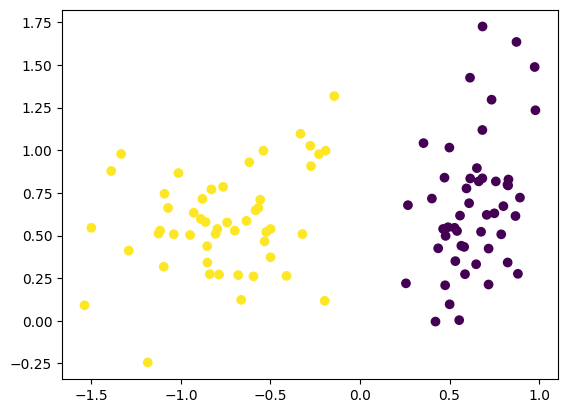

In [380]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
xs, ys = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=.65)
ys[ys == 0] = -1  # make the negative class labels == -1
plt.figure(0)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=ys);  

**2.6.1** *Using `sklearn.svm`, fit an SVM model to the training data and report the accuracy.* $\color{red}{\text{(1 point)}}$

*hint: training an SVM in `sklearn` works very similar to linear regression. you can look it up again.*

In [381]:
from sklearn.svm import SVC

# YOUR CODE HERE
model = SVC(C=1.0, kernel='linear')
model.fit(xs, ys)
ys_pred = model.predict(xs)

print("Accuracy: {}%".format(100.0 * np.mean(ys == ys_pred)))

Accuracy: 100.0%


Here is a handy plotting function to visualize the performance of your SVM. Use it to plot the results of your trained model. What do you see? Can you identify the margin hyperplanes? The support vectors?

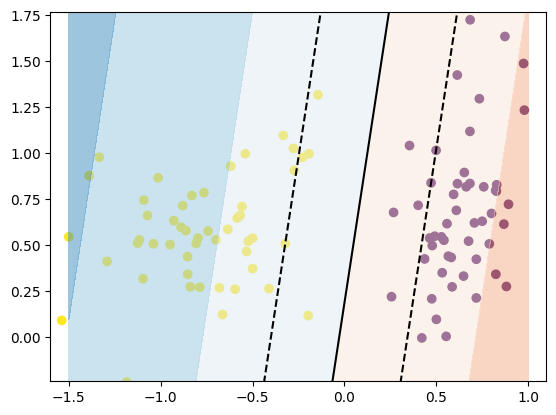

In [382]:
from matplotlib import cm

def plot_svm(model, xs, ys, h):
  """
  input:  model: sklearn.svm.SVC model
          theta: trained weights
          xs:    data
          ys:    labels
          h:     figure handle
  output: plots SVM for 3.9
  """
  # get the separating hyperplane
  theta = model.coef_[0]
  a = -theta[0] / theta[1]
  xx = np.linspace(-1.5, 1)
  yy = a * xx - (model.intercept_[0]) / theta[1]
  margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
  yy_neg = yy - np.sqrt(1 + a ** 2) * margin
  yy_pos = yy + np.sqrt(1 + a ** 2) * margin

  # plot the line, the points, and the nearest vectors to the plane
  plt.figure(h);
  plt.plot(xx, yy, "k-")
  plt.plot(xx, yy_neg, "k--")
  plt.plot(xx, yy_pos, "k--")
  plt.scatter(x=xs[:, 0], y=xs[:, 1], c=ys);
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  # Put the result into a contour plot
  plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])
  plt.xlim([-1.6,1.1])
  plt.ylim([-0.24,1.77])
  plt.show()


plot_svm(model,xs,ys,1)

How can we make the margin bigger? Try playing with the `C` hyperparameter in `sklearn.svm.SVC`.

<br>

**2.6.2** *Write some code to fit two or more SVMs that allow for more slack than the default settings. What are the consequences of this? How did you accomplish it and what was the result? What happened to the margin? Why?* $\color{red}{\text{(2 points)}}$

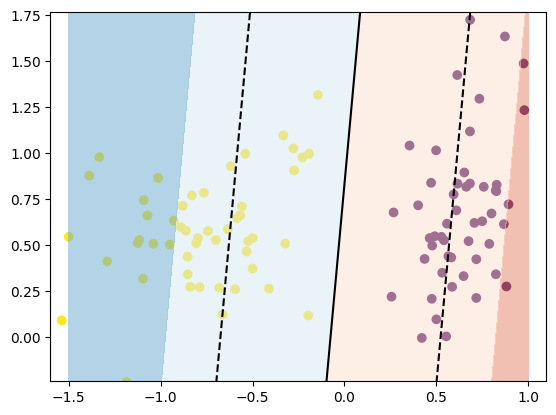

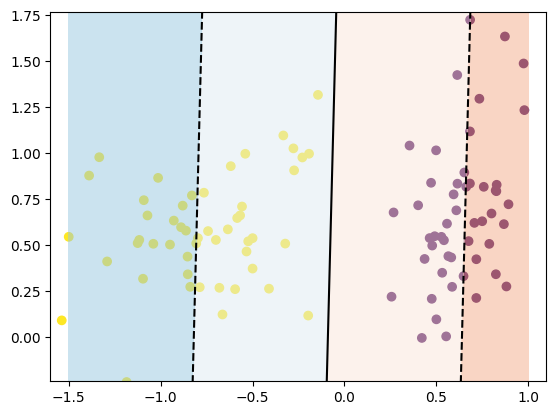

In [383]:
# YOUR CODE HERE
model_A = SVC(C=0.1, kernel='linear')
model_B = SVC(C=0.05, kernel='linear')

model_A.fit(xs, ys)
model_B.fit(xs, ys)

plot_svm(model_A, xs, ys, 2)
plot_svm(model_B, xs, ys, 3)

$\color{green}{\text{YOUR ANSWER HERE}}$
We have trained two more models, A with $C=0.1$ and B with $C=0.05$, and then plotted the results.
The original model had default value $C=1$.
$C$ is called the hyperparameter. 
The litterature on sklearn/SVC says on the parameter $C$ for SVC:
''Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.''
So a larger $C$ should mean less regularization, and thus less slack. In other words, 
smaller $C$ allows for more slack. 

Mathematically we can look at it this way: 
The constrained optimizaiton problem is the following: 
$$\min_{w, \xi} \frac{1}{2} ||w||^2 + C \frac{1}{n} \sum_{i=1}^{n} \xi_i$$
Here we have the hyperparameter $C$ and slack variables $\xi_i$. We see that if $C$ gets smaller, the slack variables are scaled down 
and thus allowed to be bigger. Thus decreasing $C$ allows for more slack. 
It is easy to se that if we allow $C \to \infty$ then $\xi_i \to 0$. Likewise, if we allow $C \to 0$ then the slack variables can get very large.

This can clearly be seen when looking at the two plots.
The marigin on the plots for both model A and B are larger than the original model, and the marigin for model B is larger than A. The slack variables are bigger because the constraints have 
been loosend and allows for more points on the wrong side of the marigin hyperplane. The marigin has increased because $C$ is smaller and more slack is allowed. 



## 2.7 Primal-Dual & Constrained Problems (2 pts + 3 bonus pts)

Assume that we want to have some arbitrary point $
{p} = [p_1\ p_2\ p_3]^T \in \mathbb{R}^3$ and some ball $S$ centered on the point ${q} = [q_1\ q_2\ q_3]^T$ with radius $R$. We are interested in finding the point on $S$ that is closest to ${p}$ in terms of the *squared Euclidean* distance.

This *constrained optimization* problem can be phrased as follows:
\begin{align}
\min_{{x}} \lVert {x} - {p} \rVert_2^2 \\
\text{subject to:} \lVert {x} - {q} \rVert_2^2 \leq R^2
\end{align}

which can be rewritten:
\begin{align}
\min_{{x}} f({x})=\lVert {x} - {p} \rVert_2^2 \\
\text{subject to: } g({x})= \lVert {x} - {q} \rVert_2^2 - R^2 \leq 0
\end{align}

<br>

The Lagrangian primal problem is:
\begin{align}
\min_{x \in \mathbb{R}} \mathcal{\psi_P}(x)  \\
\end{align}

<br>

and the Lagrangian dual problem is then given by:
\begin{align}
\max_{\alpha \in \mathbb{R}} \mathcal{\psi_D}(\alpha)  \\
\text{subject to: } \alpha \geq 0
\end{align}

<br>

where $\psi_\mathcal{D}(\alpha) = \min_{{x}} \mathcal{L}({x}, \alpha)$ and $\psi_\mathcal{P}(\alpha) = \max_{{\alpha}} \mathcal{L}({x}, \alpha)$, and $\mathcal{L}({x}, \alpha) = f({x}) + \alpha g({x})$. 

**2.7.1** *Give the expression for the Lagrangian $\mathcal{L}$.* $\color{red}{\text{(1 point)}}$

$\color{green}{\text{YOUR ANSWER HERE}}$

$$\mathcal{L}({x}, \alpha) = f({x}) + \alpha g({x}) = ||x - p||_2^2 + \alpha (||x - q||_2^2 - R^2), \; \text{s.t.} \; \alpha \ge 0.$$


**2.7.2** *Derive the gradient $\frac{\partial \mathcal{L}}{\partial \mathbf{x}}$ and set it equal to zero $\frac{\partial \mathcal{L}}{\partial \mathbf{x}} = 0$.* $\color{red}{\text{(1 point)}}$

$\color{green}{\text{YOUR ANSWER HERE}}$

$$\frac{\partial \mathcal{L}}{\partial \mathbf{x}} = \frac{\partial \mathcal{L}(\mathbf{x}, \alpha)}{\partial \mathbf{x}} = 
\frac{\partial}{\partial \mathbf{x}} (||\mathbf{x} - p||_2^2 + \alpha (||\mathbf{x} - q||_2^2 - R^2)) = $$
Distribute derivative inside.
$$= \frac{\partial}{\partial \mathbf{x}} ||\mathbf{x} - p||_2^2 + \alpha \frac{\partial}{\partial \mathbf{x}} (||\mathbf{x} - q||_2^2 - R^2) = $$
$R^2$ term is removed because it is constant w.r.t. $\mathbf{x}$.
$$= \frac{\partial}{\partial \mathbf{x}} ||\mathbf{x} - p||_2^2 + \alpha \frac{\partial}{\partial \mathbf{x}} ||\mathbf{x} - q||_2^2 = $$
Use the chain rule.
$$= 2 ||\mathbf{x} - p||_2 \frac{\partial}{\partial \mathbf{x}} ||\mathbf{x} - p||_2 + \alpha ||\mathbf{x} - q||_2 \frac{\partial}{\partial \mathbf{x}} ||\mathbf{x} - q||_2 = $$
Use the fact that $\frac{\partial}{\partial x}||x||_2 = \frac{x}{||x||_2}$, for $x \neq 0$. Thus assume that $\mathbf{x} \neq 0$, otherwise this is not differentiable.
$$= 2 ||\mathbf{x} - p||_2 \frac{\mathbf{x} - p}{||\mathbf{x} - p||_2} + \alpha ||\mathbf{x} - q||_2 \frac{\mathbf{x} - q}{||\mathbf{x} - q||_2} = $$
Cancel products.
$$= 2(\mathbf{x} - p) + 2\alpha(\mathbf{x} - q) = 2(\mathbf{x}(\alpha + 1) - p - \alpha q),$$
$$\text{s.t.} \quad \alpha \ge 0.$$
Set the gradient to 0:
$$\frac{\partial \mathcal{L}}{\partial \mathbf{x}} = 2(\mathbf{x}(\alpha + 1) - p - \alpha q) = 0.$$

**2.7.3** *Find the saddle point ${x}^\star$, where $\frac{\partial \mathcal{L}}{\partial {x}} = 0$ in terms of $p$, $q$, and $\alpha$*. $\color{blue}{\text{(1 bonus point)}}$

$\color{green}{\text{YOUR ANSWER HERE}}$


$$\frac{\partial \mathcal{L}}{\partial x} = 2(x(\alpha + 1) - p - \alpha q) = 0 \Longleftrightarrow x(\alpha + 1) - p - \alpha q = 0$$
$$\implies x^* = \frac{p + \alpha q}{1 + \alpha}.$$

**2.7.4** *Finally, show that the dual in standard form, expressed in terms of $\alpha, {q}, {p}$ and $R$ is*


$\begin{align}
\max_{{\alpha}} \frac{\alpha}{1+\alpha} \; \lVert q-p \rVert_2^2 - \alpha R^2\\
\text{s.t.} \quad \alpha \geq 0 \\
\end{align}$

*To do this, you have to plug in the solution ${x}^\star$ that you found above.* $\color{blue}{\text{(2 bonus points)}}$

$\color{green}{\text{YOUR ANSWER HERE}}$

$$\max_{\alpha \in \mathbb{R}} \mathcal{\psi_D}(\alpha) = \max_{\alpha} \min_{{x}} \mathcal{L}({x}, \alpha) = \max_{\alpha} \min_{{x}} ||x - p||_2^2 + \alpha (||x - q||_2^2 - R^2)=$$
KKT condition says if $x^*$ is a saddle point (which we have found), and $\alpha \ge 0$ then $x^*$ is an optimal vector for the opt. problem. So plug in $x^*$.
$$=\max_{\alpha} ||x^* - p||_2^2 + \alpha (||x^* - q||_2^2 - R^2) = $$
Plug in expresion for $x^*$.
$$=\max_{\alpha} ||\frac{p + \alpha q}{1 + \alpha} - p||_2^2 + \alpha ||\frac{p + \alpha q}{1 + \alpha} - q||_2^2 - \alpha R^2=$$
Extend $p$ and $q$ respectivly within norms.
$$=\max_{\alpha} ||\frac{p + \alpha q - (1+\alpha)p}{1 + \alpha}||_2^2 + \alpha ||\frac{p + \alpha q - (1+\alpha)q}{1 + \alpha}||_2^2 - \alpha R^2=$$
Simplify.
$$=\max_{\alpha} ||\frac{\alpha (q - p)}{1 + \alpha}||_2^2 + \alpha ||\frac{p - q}{1 + \alpha}||_2^2 - \alpha R^2=$$
Since $\alpha \ge 0$, we can ''lift out'' both $\alpha$ and $\frac{1}{1+\alpha}$ out of norms.
$$=\max_{\alpha} \frac{\alpha^2}{(1+\alpha)^2} ||q - p||_2^2 + \frac{\alpha}{(1 + \alpha)^2} ||q-p||_2^2 - \alpha R^2=$$
Distribute out norm.
$$=\max_{\alpha}\frac{\alpha + \alpha^2}{(1+\alpha)^2}||q - p||_2^2  - \alpha R^2=\frac{\alpha(1 + \alpha)}{(1+\alpha)^2}||q - p||_2^2  - \alpha R^2=$$
Cancel fraction.
$$=\max_{\alpha}\frac{\alpha}{1+\alpha}||q - p||_2^2  - \alpha R^2,$$
$$\text{s.t.} \quad \alpha \geq 0.$$


## 2.8 K-Medoids Clustering (5 bonus pts)

Assume that we have a dataset $\mathcal{D} = \lbrace \mathbf{x}_i \rbrace_{i=1}^N$ *without* any labels. We are interested in finding a certain number of clusters (called $K$) around which other points tend to "gather". One simple method to achieve this is called **K-Medoids**. This method entails that we have to pick $K$ upfront, thereby we express our prior knowledge on how many clusters we believe to have in the data.

Suppose we start out with some cluster centres $\mathbf{S}_k$ ($k=1,\ldots,K$) that are initialized by randomly picking points (without repetition).

A simple way to solve this problem is by using *Voronoi iterarion* also known as *Lloyd's Algorithm*. It comprises two steps:
1. *Assign* - Map each point $\mathbf{x} \in \mathcal{D}$ to the closest cluster w.r.t. some distance (Euclidean in this case)
2. *Update* - For each cluster $\mathbf{S}_k$, recalculate $x_{m_k}$ by finding the point (the so-called medoid point) within the cluster $k$ that has the minimum distance w.r.t. the other points of cluster $k$
3. Repeat step 1.

Your task will be to program the three functions `initialize_cluster_centres_from_random_points`, `assign` and `update`. You can use `scipy.spatial.distance.cdist` to compute the pairwise distances.

**2.8.1** *Program the function to initialize $K$ clusters* ```initialize_cluster_centres_from_random_points(xs, K)```. $\color{blue}{\text{(1 bonus point)}}$

In [384]:
import numpy as np

def initialize_cluster_centres_from_random_points(xs, K):
    """
    Randomly samples K points from 'xs' 
    Returns
      An np.ndarray of shape [K, d] containing the initial medoids
    """
    # YOUR CODE HERE
    return xs[np.random.choice(xs.shape[0], K, replace=False), :]

**2.8.2** *Program the function to assign a label corresponding to one the $z_i \in \{1,\ldots,K\}$ clusters to each datapoint* $x_i$ ```closest_cluster(xs, m)```. $\color{blue}{\text{(1 bonus point)}}$

In [385]:
from scipy.spatial.distance import cdist

def assign(xs, m):
    """
    Computes a vector of cluster indices for each point in 'xs'. Each point gets assigned to the closest cluster.
      xs: An np.ndarray of shape [N, d] where d is the dimension of the points
      m: An np.ndarray of shape [K, d] where K is the number of clusters
      
    Returns:
      An np.ndarray of shape [N]
    """
    # YOUR CODE HERE
    dist = cdist(xs, m, 'euclidean')
    N = len(xs)
    K = len(m)
    z = np.zeros(N)
    for i in range(N):
      min_dist = np.inf
      for j in range(K):
        if dist[i,j] < min_dist:
           min_dist = dist[i,j]
           z[i] = j + 1
    return z

**2.8.3** *Program a function  ```medoid_point(pts)``` to returm the medoid $m_k$ of a given set of points* $S_k$. $\color{blue}{\text{(1 bonus point)}}$

In [386]:
def medoid_point(pts):
    """
    Computes the medoid point (w.r.t. the Euclidean distance)
    pts: A np.ndarray of shape [N, d]
    
    Returns:
      An np.ndarray of shape [d] (the medoid)
    """
    # YOUR CODE HERE
    sum_dist = sum(cdist(pts, pts, 'euclidean'))
    N = len(pts)
    min_dist = np.inf
    for i in range(N):
      if sum_dist[i] < min_dist:
          min_dist = sum_dist[i]
          medoid = pts[i]
    return medoid

    

**2.8.4** *Program a function  ```update(xs, m, z)``` that assigns new medoids that minimize the distance to members in each cluster.* $\color{blue}{\text{(1 bonus point)}}$

In [387]:
def update(xs, m, z):
    """
        xs: An np.ndarray of shape [N, d] where d is the dimension of the points
        m: An np.ndarray of shape [K, d] where K is the number of clusters
        z: An np.ndarray of shape [N] that maps each point to a cluster index
        
    Returns:
       An np.ndarray of shape [K, d]
    """
    K, d = m.shape
    new_m = np.zeros_like(m)
    for k in range(K):
      # YOUR CODE HERE
      Sk = xs[z == k + 1] # Retrieve k:th cluster, Sk.
      new_m[k] = medoid_point(Sk) 
    return new_m

Now, let's apply the functions on our favorite dataset. First, plot the unassigned points.

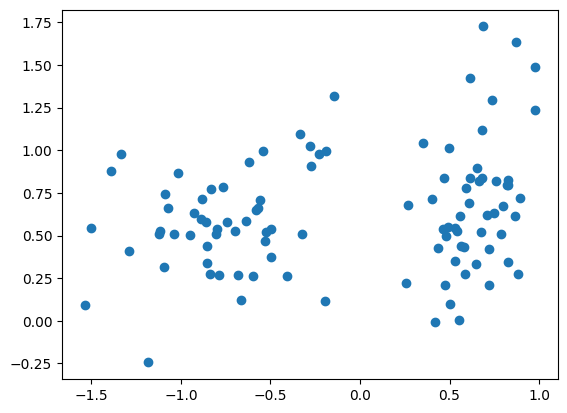

In [388]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
xs,_ = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=.65)
plt.scatter(x=xs[:, 0], y=xs[:, 1]);

Now, pick some initial medoids. We will use 

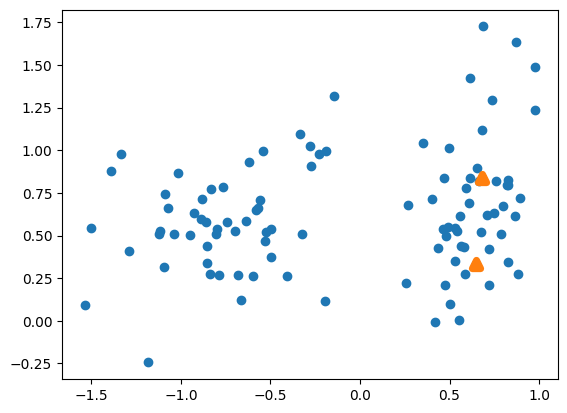

In [394]:
K = 2
m = initialize_cluster_centres_from_random_points(xs, K)
plt.scatter(x=xs[:, 0], y=xs[:, 1])
plt.scatter(x=m[:, 0], y=m[:, 1], marker="^", linewidth=5);

Apply the assignment step to get an initial clustering.

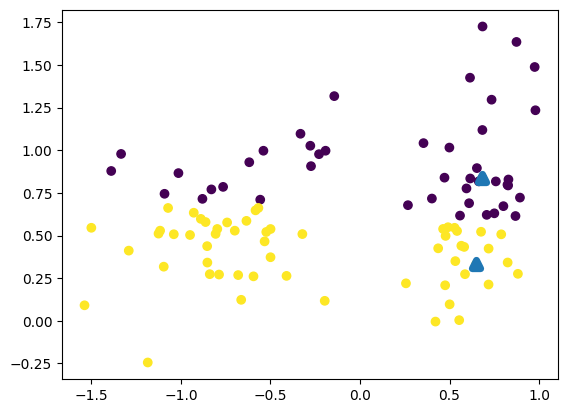

In [395]:
z = assign(xs, m)
plt.scatter(x=xs[:, 0], y=xs[:, 1], c=z)
plt.scatter(x=m[:, 0], y=m[:, 1], marker="^", linewidth=5);

**2.8.5** *Iterate the* update *and* assign *steps $t$ times, plotting the result each step.* $\color{blue}{\text{(1 bonus point)}}$

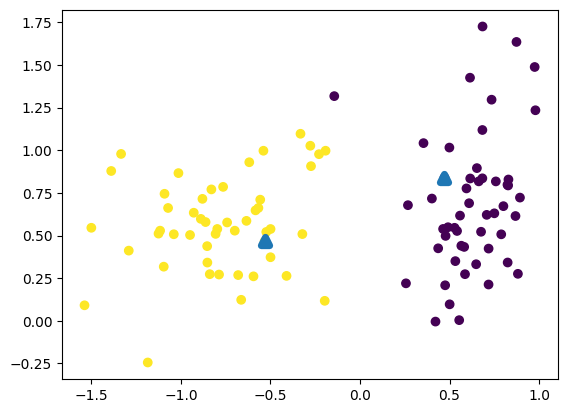

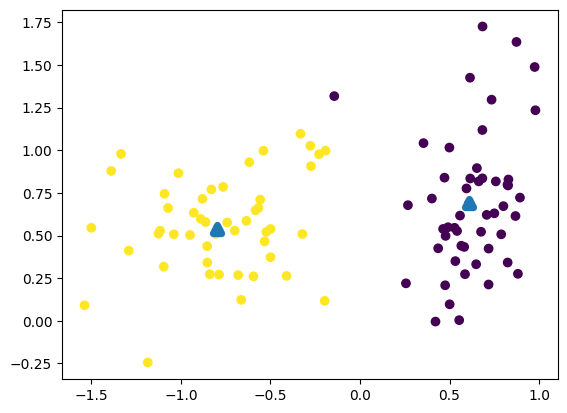

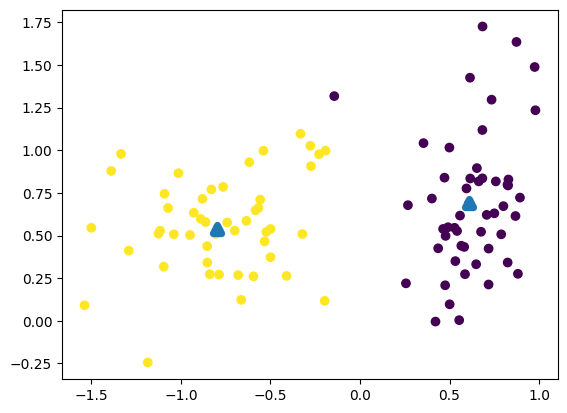

In [396]:
t = 3
for i in range(t):
  # YOUR CODE HERE
  m = update(xs, m, z)
  z = assign(xs, m)

  plt.figure(i)
  plt.scatter(x=xs[:, 0], y=xs[:, 1], c=z)
  plt.scatter(x=m[:, 0], y=m[:, 1], marker="^", linewidth=5);
  